# Visualize MAWI background traffic distribution

## Traffic intensity development over time (packets arriving per time interval)

In [ ]:
import csv_trace_statistics as visualizer
import pandas as pd

mawi_packet_counts = []

for i in range(6):
    file = "../data/datasets/mawi/mawi_background-%d.csv" % i
    csv = pd.read_csv(file)
    mawi_packet_counts.extend(visualizer.packetCountPerInterval(csv, 0.0, 150.0, 30.0))

In [ ]:
import matplotlib.pyplot as plt

plt.figure(facecolor='white')
plt.ylabel("Packets [million per 30s]",  size=14)
plt.xlabel("Time [minutes]", size=14)
plt.title("MAWI Traffic Intensity Development", size=16)
plt.yticks(range(0, int(0.8*(10**7)), 10**6), range(0, 8, 1))
plt.ylim([0, 7* (10**6)])
plt.xticks(range(0, 35, 6), range(0, 16, 3), size=12)
plt.plot(range(len(mawi_packet_counts)), mawi_packet_counts)
plt.savefig("../results/mawi_intensity_over_time.png", bbox_inches="tight")
plt.show()

In [7]:
import csv_trace_statistics as visualizer
import pandas as pd

caida_packet_counts = [0]*8

for i in range(11, 14):
    file = "../data/datasets/ddos-2007/ddos-%d.csv" % i
    csv = pd.read_csv(file)
    caida_packet_counts.extend(visualizer.packetCountPerInterval(csv, 0.0, 150.0, 30.0))

caida_packet_counts.extend([0]*7)

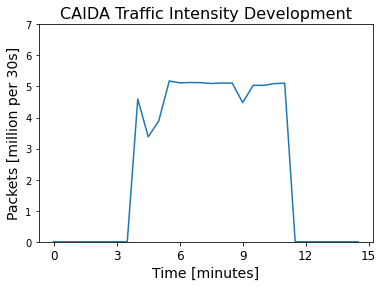

In [8]:
import matplotlib.pyplot as plt

plt.figure(facecolor='white')
plt.ylabel("Packets [million per 30s]",  size=14)
plt.xlabel("Time [minutes]", size=14)
plt.title("CAIDA Traffic Intensity Development", size=16)
plt.yticks(range(0, int(0.8*(10**7)), 10**6), range(0, 8, 1))
plt.ylim([0, 7* (10**6)])
plt.xticks(range(0, 35, 6), range(0, 16, 3), size=12)
plt.plot(range(len(caida_packet_counts)), caida_packet_counts)
plt.savefig("../results/caida_intensity_over_time.png", bbox_inches="tight")
plt.show()

## IP source and destination distribution of background traffic

In [ ]:
import csv_trace_statistics as visualizer
import pandas as pd
file = "../data/datasets/mawi/mawi_background.csv"
csv = pd.read_csv(file).dropna()
mavi_source_distribution = visualizer.histogramOfSourceSubnetFrequency(csv, 2**7)
mavi_destination_distribution = visualizer.histogramOfTargetSubnetFrequency(csv, 2**7)

In [ ]:
import matplotlib.pyplot as plt
plt.title("Source IP Distribution")
plt.xlabel("/7 subnets")
plt.ylabel("Packet Count from Subnet")
plt.xlim([0, 2**7])
plt.yticks([])
plt.plot(range(len(mavi_source_distribution)), mavi_source_distribution)
plt.legend(["MAWI"])
plt.show()

In [ ]:
plt.title("Destination IP Distribution")
plt.xlabel("/7 subnets")
plt.ylabel("Packet Count to Subnet")
plt.xlim([0, 2**7])
plt.yticks([])
plt.plot(range(len(mavi_destination_distribution)), mavi_destination_distribution)
plt.legend(["MAWI"])
plt.show()